## Tweet Sentiment Analysis Using the TextBlob library

Steps:
- Import the necessary libraries.
- Load the CSV file.
- Fetch the text column from the DataFrame.
- Extract and remove the handles from the fetched data.
- Perform sentiment analysis and get the new DataFrame.
- Join both the DataFrames.
- Apply appropriate conditions and view positive, negative, and neutral tweet

In [1]:
import pandas as pd
from textblob import TextBlob
import re

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
pd.set_option('display.max_colwidth', 240)

In [ ]:
TWEET_DATA_FILE = 'Tweets.csv'
tweets = pd.read_csv(TWEET_DATA_FILE, usecols=['text']) #  usecols=['text'] this will read only the text column
tweets.columns = ['Tweet']


In [ ]:
tweets.head(20)

,Tweet
0,@VirginAmerica What @dhepburn said.
1,@VirginAmerica plus you've added commercials to the experience... tacky.
2,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,@VirginAmerica and it's a really big bad thing about it
5,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA
6,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)"
7,"@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP"
8,"@virginamerica Well, I didn't…but NOW I DO! :-D"
9,"@VirginAmerica it was amazing, and arrived an hour early. You're too good to me."


In [ ]:
# Use extract() function to extract the @ handle (uses a regex to get parts of a string)

tweets['handle'] = tweets.Tweet.str.extract(r'^(@\S+)')

# note this will extract strings that start with @ and does not have space and place it in a new column
# where capital S means no space 
# small s means there is space

In [ ]:
 #function to remove the Twitter handles that was extracted
def remove_handles(tweet):
  return re.sub(r'@\S+', '', tweet)

In [ ]:
# apply remove handles function to tweets(the dataset) into a new created tweet_text column 
# to remove the twitter handles from the new colunm and leave this column with the tweet text
tweets['tweet_text'] = tweets.Tweet.apply(remove_handles)

In [ ]:
# view the first 5 records of the entire DataFrame after removing the Twitter handles
tweets.head(5)

# this will help view the new column showing that the twitter handles have been extracted 

,Tweet,handle,tweet_text
0,@VirginAmerica What @dhepburn said.,@VirginAmerica,What said.
1,@VirginAmerica plus you've added commercials to the experience... tacky.,@VirginAmerica,plus you've added commercials to the experience... tacky.
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,@VirginAmerica,I didn't today... Must mean I need to take another trip!
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",@VirginAmerica,"it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,@VirginAmerica and it's a really big bad thing about it,@VirginAmerica,and it's a really big bad thing about it


In [ ]:
# view the initial 10 records of the "tweet_text" DataFrame after removing the Twitter handles
tweets['tweet_text'].head(10)

0                                                                                                                   What  said.
1                                                                     plus you've added commercials to the experience... tacky.
2                                                                      I didn't today... Must mean I need to take another trip!
3               it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse
4                                                                                      and it's a really big bad thing about it
5     seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA
6                                                              yes, nearly every time I fly VX this “ear worm” won’t go away :)
7                                 Really missed a prime opportunity for Men Without Hats parody, there. 

In [ ]:
# create a get_sentiment() function
# accepts a DataFrame and a column as parameters

def get_sentiment(dataframe, column):
  text_column = dataframe[column]
  
  #apply TextBlob constructor to each value of text_column 
  textblob_sentiment = text_column.apply(TextBlob)

  # extracts and creates a new DataFrame for Polarity and Objectivity columns
  sentiment_values = [ {'Polarity': v.sentiment.polarity,'Subjectivity': v.sentiment.subjectivity}
                      for v in textblob_sentiment.values]
  return pd.DataFrame(sentiment_values)

In [ ]:
# test the get_sentiment function
sentiment_frame = get_sentiment(tweets, 'tweet_text')

In [ ]:
sentiment_frame.head(6)

# Polarity is the output that lies between [-1,1], 
# where -1 refers to negative sentiment and +1 refers to positive sentiment.
# Subjectivity is the output that lies within [0,1] and refers to personal opinions and judgments.

,Polarity,Subjectivity
0,0.000000,0.000000
1,0.000000,0.000000
2,-0.390625,0.687500
3,0.006250,0.350000
4,-0.350000,0.383333
5,-0.208333,0.633333


In [ ]:
# join the original tweet DataFrame to the sentiment_frame DataFrame

tweets = pd.concat([tweets, sentiment_frame], axis=1)

In [ ]:
tweets.head(10)

,Tweet,handle,tweet_text,Polarity,Subjectivity
0,@VirginAmerica What @dhepburn said.,@VirginAmerica,What said.,0.000000,0.000000
1,@VirginAmerica plus you've added commercials to the experience... tacky.,@VirginAmerica,plus you've added commercials to the experience... tacky.,0.000000,0.000000
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,@VirginAmerica,I didn't today... Must mean I need to take another trip!,-0.390625,0.687500
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",@VirginAmerica,"it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",0.006250,0.350000
4,@VirginAmerica and it's a really big bad thing about it,@VirginAmerica,and it's a really big bad thing about it,-0.350000,0.383333
5,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA,@VirginAmerica,seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA,-0.208333,0.633333
6,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)",@VirginAmerica,"yes, nearly every time I fly VX this “ear worm” won’t go away :)",0.466667,0.766667
7,"@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP",@VirginAmerica,"Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP",0.200000,0.200000
8,"@virginamerica Well, I didn't…but NOW I DO! :-D",@virginamerica,"Well, I didn't…but NOW I DO! :-D",1.000000,1.000000
9,"@VirginAmerica it was amazing, and arrived an hour early. You're too good to me.",@VirginAmerica,"it was amazing, and arrived an hour early. You're too good to me.",0.466667,0.600000


In [ ]:
positive_tweets = tweets[tweets.Polarity > 0.5]
negative_tweets = tweets[tweets.Polarity <= - 0.5]
neutral_tweets = tweets[ (tweets.Polarity > -0.5) & (tweets.Polarity <0.5) ]

In [ ]:
negative_tweets

,Tweet,handle,tweet_text,Polarity,Subjectivity
33,"@VirginAmerica awaiting my return phone call, just would prefer to use your online self-service option :(",@VirginAmerica,"awaiting my return phone call, just would prefer to use your online self-service option :(",-0.750000,1.000000
84,@VirginAmerica it was a disappointing experience which will be shared with every business traveler I meet. #neverflyvirgin,@VirginAmerica,it was a disappointing experience which will be shared with every business traveler I meet. #neverflyvirgin,-0.600000,0.700000
87,@VirginAmerica Random Q: what's the distribution of elevate avatars? I bet that kitty has a disproportionate share http://t.co/APtZpuROp4,@VirginAmerica,Random Q: what's the distribution of elevate avatars? I bet that kitty has a disproportionate share http://t.co/APtZpuROp4,-0.500000,0.500000
97,@VirginAmerica - Let 2 scanned in passengers leave the plane than told someone to remove their bag from 1st class bin? #uncomfortable,@VirginAmerica,- Let 2 scanned in passengers leave the plane than told someone to remove their bag from 1st class bin? #uncomfortable,-0.500000,1.000000
99,@VirginAmerica is anyone doing anything there today? Website is useless and no one is answering the phone.,@VirginAmerica,is anyone doing anything there today? Website is useless and no one is answering the phone.,-0.500000,0.200000
...,...,...,...,...,...
14483,@AmericanAir The bad weather wasn't a surprise! You should have double/triple staff on hand to handle calls. Way to treat your customers.,@AmericanAir,The bad weather wasn't a surprise! You should have double/triple staff on hand to handle calls. Way to treat your customers.,-0.875000,0.666667
14507,"@AmericanAir i dont believe it, it has been impossible for your agents to get an update from the delivery company since yesterday at 11 am",@AmericanAir,"i dont believe it, it has been impossible for your agents to get an update from the delivery company since yesterday at 11 am",-0.666667,1.000000
14535,@AmericanAir Flight Cancelled Flighted and rebooked but agent made a mistake and booked wrong date! Been trying to get through via phone for hours!!,@AmericanAir,Flight Cancelled Flighted and rebooked but agent made a mistake and booked wrong date! Been trying to get through via phone for hours!!,-0.976562,0.900000
14568,@AmericanAir i was spoken 2 like I'm an idiot and that is not OK!! I don't need to deal w/ that esp after the travel experience I've had,@AmericanAir,i was spoken 2 like I'm an idiot and that is not OK!! I don't need to deal w/ that esp after the travel experience I've had,-0.595313,0.650000


In [ ]:
positive_tweets

,Tweet,handle,tweet_text,Polarity,Subjectivity
8,"@virginamerica Well, I didn't…but NOW I DO! :-D",@virginamerica,"Well, I didn't…but NOW I DO! :-D",1.000000,1.000000
19,@VirginAmerica you know what would be amazingly awesome? BOS-FLL PLEASE!!!!!!! I want to fly with only you.,@VirginAmerica,you know what would be amazingly awesome? BOS-FLL PLEASE!!!!!!! I want to fly with only you.,0.600000,0.966667
22,@VirginAmerica I love the hipster innovation. You are a feel good brand.,@VirginAmerica,I love the hipster innovation. You are a feel good brand.,0.600000,0.600000
34,@VirginAmerica this is great news! America could start flights to Hawaii by end of year http://t.co/r8p2Zy3fe4 via @Pacificbiznews,@VirginAmerica,this is great news! America could start flights to Hawaii by end of year http://t.co/r8p2Zy3fe4 via,1.000000,0.750000
35,Nice RT @VirginAmerica: Vibe with the moodlight from takeoff to touchdown. #MoodlitMonday #ScienceBehindTheExperience http://t.co/Y7O0uNxTQP,NaN,Nice RT Vibe with the moodlight from takeoff to touchdown. #MoodlitMonday #ScienceBehindTheExperience http://t.co/Y7O0uNxTQP,0.600000,1.000000
...,...,...,...,...,...
14566,"@AmericanAir i was also told by agents my issues ""aren't their prob"" K fine. I get it. But have some compassion 4 others dealing w/this!!!",@AmericanAir,"i was also told by agents my issues ""aren't their prob"" K fine. I get it. But have some compassion 4 others dealing w/this!!!",0.813802,0.500000
14577,@AmericanAir I have never on all my trips on any airline ever nat'l or int'l ever experienced anything like this!,@AmericanAir,I have never on all my trips on any airline ever nat'l or int'l ever experienced anything like this!,1.000000,0.900000
14587,@AmericanAir I’ll play it by ear. I know that you are doing your best. Buy some chewey oatmeal cookies for your customer care folks.,@AmericanAir,I’ll play it by ear. I know that you are doing your best. Buy some chewey oatmeal cookies for your customer care folks.,1.000000,0.300000
14625,@AmericanAir Flight 236 was great. Fantastic cabin crew. A+ landing. #thankyou #JFK http://t.co/dRW08djHAI,@AmericanAir,Flight 236 was great. Fantastic cabin crew. A+ landing. #thankyou #JFK http://t.co/dRW08djHAI,0.600000,0.825000


In [ ]:
# display the results of neutral tweets
neutral_tweets

,Tweet,handle,tweet_text,Polarity,Subjectivity
0,@VirginAmerica What @dhepburn said.,@VirginAmerica,What said.,0.000000,0.000000
1,@VirginAmerica plus you've added commercials to the experience... tacky.,@VirginAmerica,plus you've added commercials to the experience... tacky.,0.000000,0.000000
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,@VirginAmerica,I didn't today... Must mean I need to take another trip!,-0.390625,0.687500
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",@VirginAmerica,"it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",0.006250,0.350000
4,@VirginAmerica and it's a really big bad thing about it,@VirginAmerica,and it's a really big bad thing about it,-0.350000,0.383333
...,...,...,...,...,...
14635,@AmericanAir thank you we got on a different flight to Chicago.,@AmericanAir,thank you we got on a different flight to Chicago.,0.000000,0.600000
14636,@AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc,@AmericanAir,leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc,-0.300000,0.600000
14637,@AmericanAir Please bring American Airlines to #BlackBerry10,@AmericanAir,Please bring American Airlines to #BlackBerry10,0.000000,0.000000
14638,"@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??",@AmericanAir,"you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??",-0.125000,0.375000


In [ ]:
def tweetsPolarity(x):
  if x > 0.5:
    return 'Positive'
  elif x <= - 0.5:
    return 'Negative'
  elif x > -0.5:
    return 'Neutral'
  elif x < 0.5:
    return 'Neutral'



In [ ]:
# create a new column to save the sentiments result
tweets['Results'] = tweets['Polarity'].apply(tweetsPolarity)

In [ ]:
tweets.head(10)

,Tweet,handle,tweet_text,Polarity,Subjectivity,Results
0,@VirginAmerica What @dhepburn said.,@VirginAmerica,What said.,0.000000,0.000000,Neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,@VirginAmerica,plus you've added commercials to the experience... tacky.,0.000000,0.000000,Neutral
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,@VirginAmerica,I didn't today... Must mean I need to take another trip!,-0.390625,0.687500,Neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",@VirginAmerica,"it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",0.006250,0.350000,Neutral
4,@VirginAmerica and it's a really big bad thing about it,@VirginAmerica,and it's a really big bad thing about it,-0.350000,0.383333,Neutral
5,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA,@VirginAmerica,seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA,-0.208333,0.633333,Neutral
6,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)",@VirginAmerica,"yes, nearly every time I fly VX this “ear worm” won’t go away :)",0.466667,0.766667,Neutral
7,"@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP",@VirginAmerica,"Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP",0.200000,0.200000,Neutral
8,"@virginamerica Well, I didn't…but NOW I DO! :-D",@virginamerica,"Well, I didn't…but NOW I DO! :-D",1.000000,1.000000,Positive
9,"@VirginAmerica it was amazing, and arrived an hour early. You're too good to me.",@VirginAmerica,"it was amazing, and arrived an hour early. You're too good to me.",0.466667,0.600000,Neutral


Neutral     12765
Positive     1047
Negative      828
Name: Results, dtype: int64


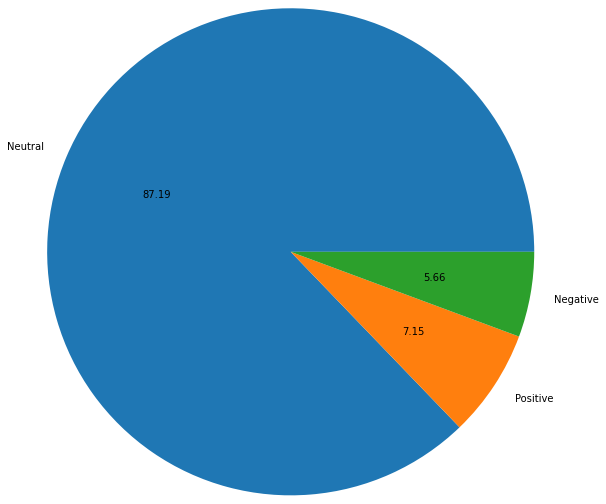

In [ ]:
# draw a graph to display 
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show

#tweets.groupby('Results').size().plot(kind='pie', autopct='%.2f')

values= tweets['Results'].value_counts() #counting unique value frequency
labels= tweets['Results'].unique().tolist() #creating the unique value labels

plt.pie(values, labels=labels, radius=2.8, autopct='%.2f')
print(values)

## Understanding Data for Sentiment Analysis
### For prediction using LogisticRegression

In [4]:
# import libraries
import pandas as pd

# set the display width to 200 characters 
pd.set_option('display.max_colwidth', 200)

In [5]:
# download from https://www.kaggle.com/datasets/haithemhermessi/sentiment-labelled-sentences-data-set
IMDB_DATA_FILE = 'imdb_labelled.txt'
YELP_DATA_FILE = 'yelp_labelled.txt'
AMAZON_DATA_FILE = 'amazon_cells_labelled.txt'
COLUMN_NAMES = ['Review', 'Sentiment']

In [6]:
# load the IMDB reviews
imdb_reviews = pd.read_table(IMDB_DATA_FILE, names=COLUMN_NAMES)

imdb_reviews.head(10)

,Review,Sentiment
0,"A very, very, very slow-moving, aimless movie about a distressed, drifting young man.",0
1,"Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.",0
2,"Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.",0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.,1
5,"The rest of the movie lacks art, charm, meaning... If it's about emptiness, it works I guess because it's empty.",0
6,Wasted two hours.,0
7,"Saw the movie today and thought it was a good effort, good messages for kids.",1
8,A bit predictable.,0
9,Loved the casting of Jimmy Buffet as the science teacher.,1


In [7]:
#check the ntotal records of the IMDB review file
imdb_reviews.Sentiment.value_counts()

1    386
0    362
Name: Sentiment, dtype: int64

In [8]:
# format the data
imdb_counts = imdb_reviews.Sentiment.value_counts().to_frame()
imdb_counts.index = pd.Series(['Positive', 'Negative'])
imdb_counts

,Sentiment
Positive,386
Negative,362


In [9]:
AMAZON_DATA_FILE
#imdb_reviews =   pd.read_table(IMDB_DATA_FILE, names=COLUMN_NAMES)
amazon_reviews = pd.read_table(AMAZON_DATA_FILE, names=COLUMN_NAMES)


In [10]:
# load the amazon reviews

amazon_reviews = pd.read_table(AMAZON_DATA_FILE, names=COLUMN_NAMES)
amazon_reviews.head(10)

,Review,Sentiment
0,So there is no way for me to plug it in here in the US unless I go by a converter.,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up right to get decent volume.,0
6,"If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.",0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


In [11]:
# load yelp reviews
yelp_reviews = pd.read_table(YELP_DATA_FILE, names=COLUMN_NAMES)
yelp_reviews.head(10)

,Review,Sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.,1
4,The selection on the menu was great and so were the prices.,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.,0
8,The fries were great too.,1
9,A great touch.,1


In [12]:
# concatenate the different datasets into one dataset,
# This will join all the rows in the table into one
review_data = pd.concat([amazon_reviews, imdb_reviews, yelp_reviews])

review_data.sample(10)

,Review,Sentiment
139,My drink was never empty and he made some really great menu suggestions.,1
636,Very disappointed and wondered how it could be in the Oscar shortlist.,0
966,But I don't like it.,0
71,"Even in my BMW 3 series which is fairly quiet, I have trouble hearing what the other person is saying.",0
264,The seafood was fresh and generous in portion.,1
307,About ten minutes into this film I started having second thoughts.,0
456,"The food was very good and I enjoyed every mouthful, an enjoyable relaxed venue for couples small family groups etc.",1
575,"The pizza tasted old, super chewy in not a good way.",0
341,Was not happy.,0
500,It's a case of 'so bad it is laughable'.,0


In [13]:
review_data.value_counts

<bound method DataFrame.value_counts of                                                                                                                                      Review  \
0                                                        So there is no way for me to plug it in here in the US unless I go by a converter.   
1                                                                                                               Good case, Excellent value.   
2                                                                                                                    Great for the jawbone.   
3                                                           Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!   
4                                                                                                                         The mic is great.   
..                                                                                                    

In [14]:
review_data.Sentiment.value_counts

<bound method IndexOpsMixin.value_counts of 0      0
1      1
2      1
3      0
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Sentiment, Length: 2748, dtype: int64>

In [15]:
# create a clean() function and do some preprocessing
import re
def clean(text):
  text = re.sub(r'[\W]+', ' ', text.lower())
  text = text.replace('hadn t' , 'had not').replace('wasn t', 'was not').replace('didn t', 'did not')
  return text

In [16]:
# clean and tokenize
review_model_data = review_data.copy()
review_model_data.Review = review_data.Review.apply(clean)

In [17]:
yelp_model_data = yelp_reviews.Review.apply(clean)
yelp_model_data

0                                                                                                                      wow loved this place 
1                                                                                                                         crust is not good 
2                                                                                                  not tasty and the texture was just nasty 
3                                                    stopped by during the late may bank holiday off rick steve recommendation and loved it 
4                                                                                the selection on the menu was great and so were the prices 
                                                                       ...                                                                  
995                                                                       i think food should have flavor and texture and both were lacking 
996          

In [18]:
# sample the data to visualize the processed text 
review_model_data.sample(10)

,Review,Sentiment
193,i have had problems wit hit dropping signal and more,0
826,not as good as i had hoped,0
522,that s how i d describe this painfully dreary time waster of a film,0
48,this case seems well made,1
298,customer service was terrible,0
0,a very very very slow moving aimless movie about a distressed drifting young man,0
22,overall the film is interesting and thought provoking,1
232,very very fun chef,1
431,we loved the biscuits,1
440,i have to say that this film was excellently produced and tops the ratings as a typical sci fi film,1


## TF-IDF vector
Term frequency (TF) works by looking at the frequency of a particular term you are concerned with relative to the document. There are multiple measures, or ways, of defining frequency:
-Number of times the word appears in a document (raw count).
- raw count of occurences divided by number of words in the document

Inverse document frequency (IDF) looks at how common (or uncommon) a word is amongst the corpus. IDF is calculated as follows where t is the term (word) we are looking to measure the commonness of and N is the number of documents (d) in the corpus (D).

In [20]:
# use TfidfVectorizer to convert each review into a TFIDF vector

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [22]:
# combine TfidfVectorizer and LogisticRegression in a Pipeline object
tfidf = TfidfVectorizer(strip_accents=None, preprocessor=None, lowercase=False)
log_reg = LogisticRegression(random_state=0, solver='lbfgs')
log_tfidf = Pipeline([('vect', tfidf), ('clf', log_reg)])


In [23]:
# split the data into train and test sets using train_test_split()
X_train, X_test, y_train, y_test = train_test_split(review_model_data.Review, review_model_data.Sentiment, test_size=0.3, random_state=42)

In [24]:
# fit the training data to the training pipeline
log_tfidf.fit(X_train.values, y_train.values)

Pipeline(steps=[('vect', TfidfVectorizer(lowercase=False)),
                ('clf', LogisticRegression(random_state=0))])

In [25]:
# Use score() function to check our model's accuracy
test_accuracy = log_tfidf.score(X_test.values, y_test.values)
'The model has a test accuracy of {:.0%}'.format(test_accuracy)

'The model has a test accuracy of 81%'

In [27]:
#Predict the sentiment of sentences
log_tfidf.predict(['I loved this place', 'I hated this place', 'this place is nice', "How I wish it is good", "I'm not sure if it is good"])

array([1, 0, 1, 1, 0])